Measurement results: {'000011': 1, '011011': 997, '100101': 1, '000010': 1}


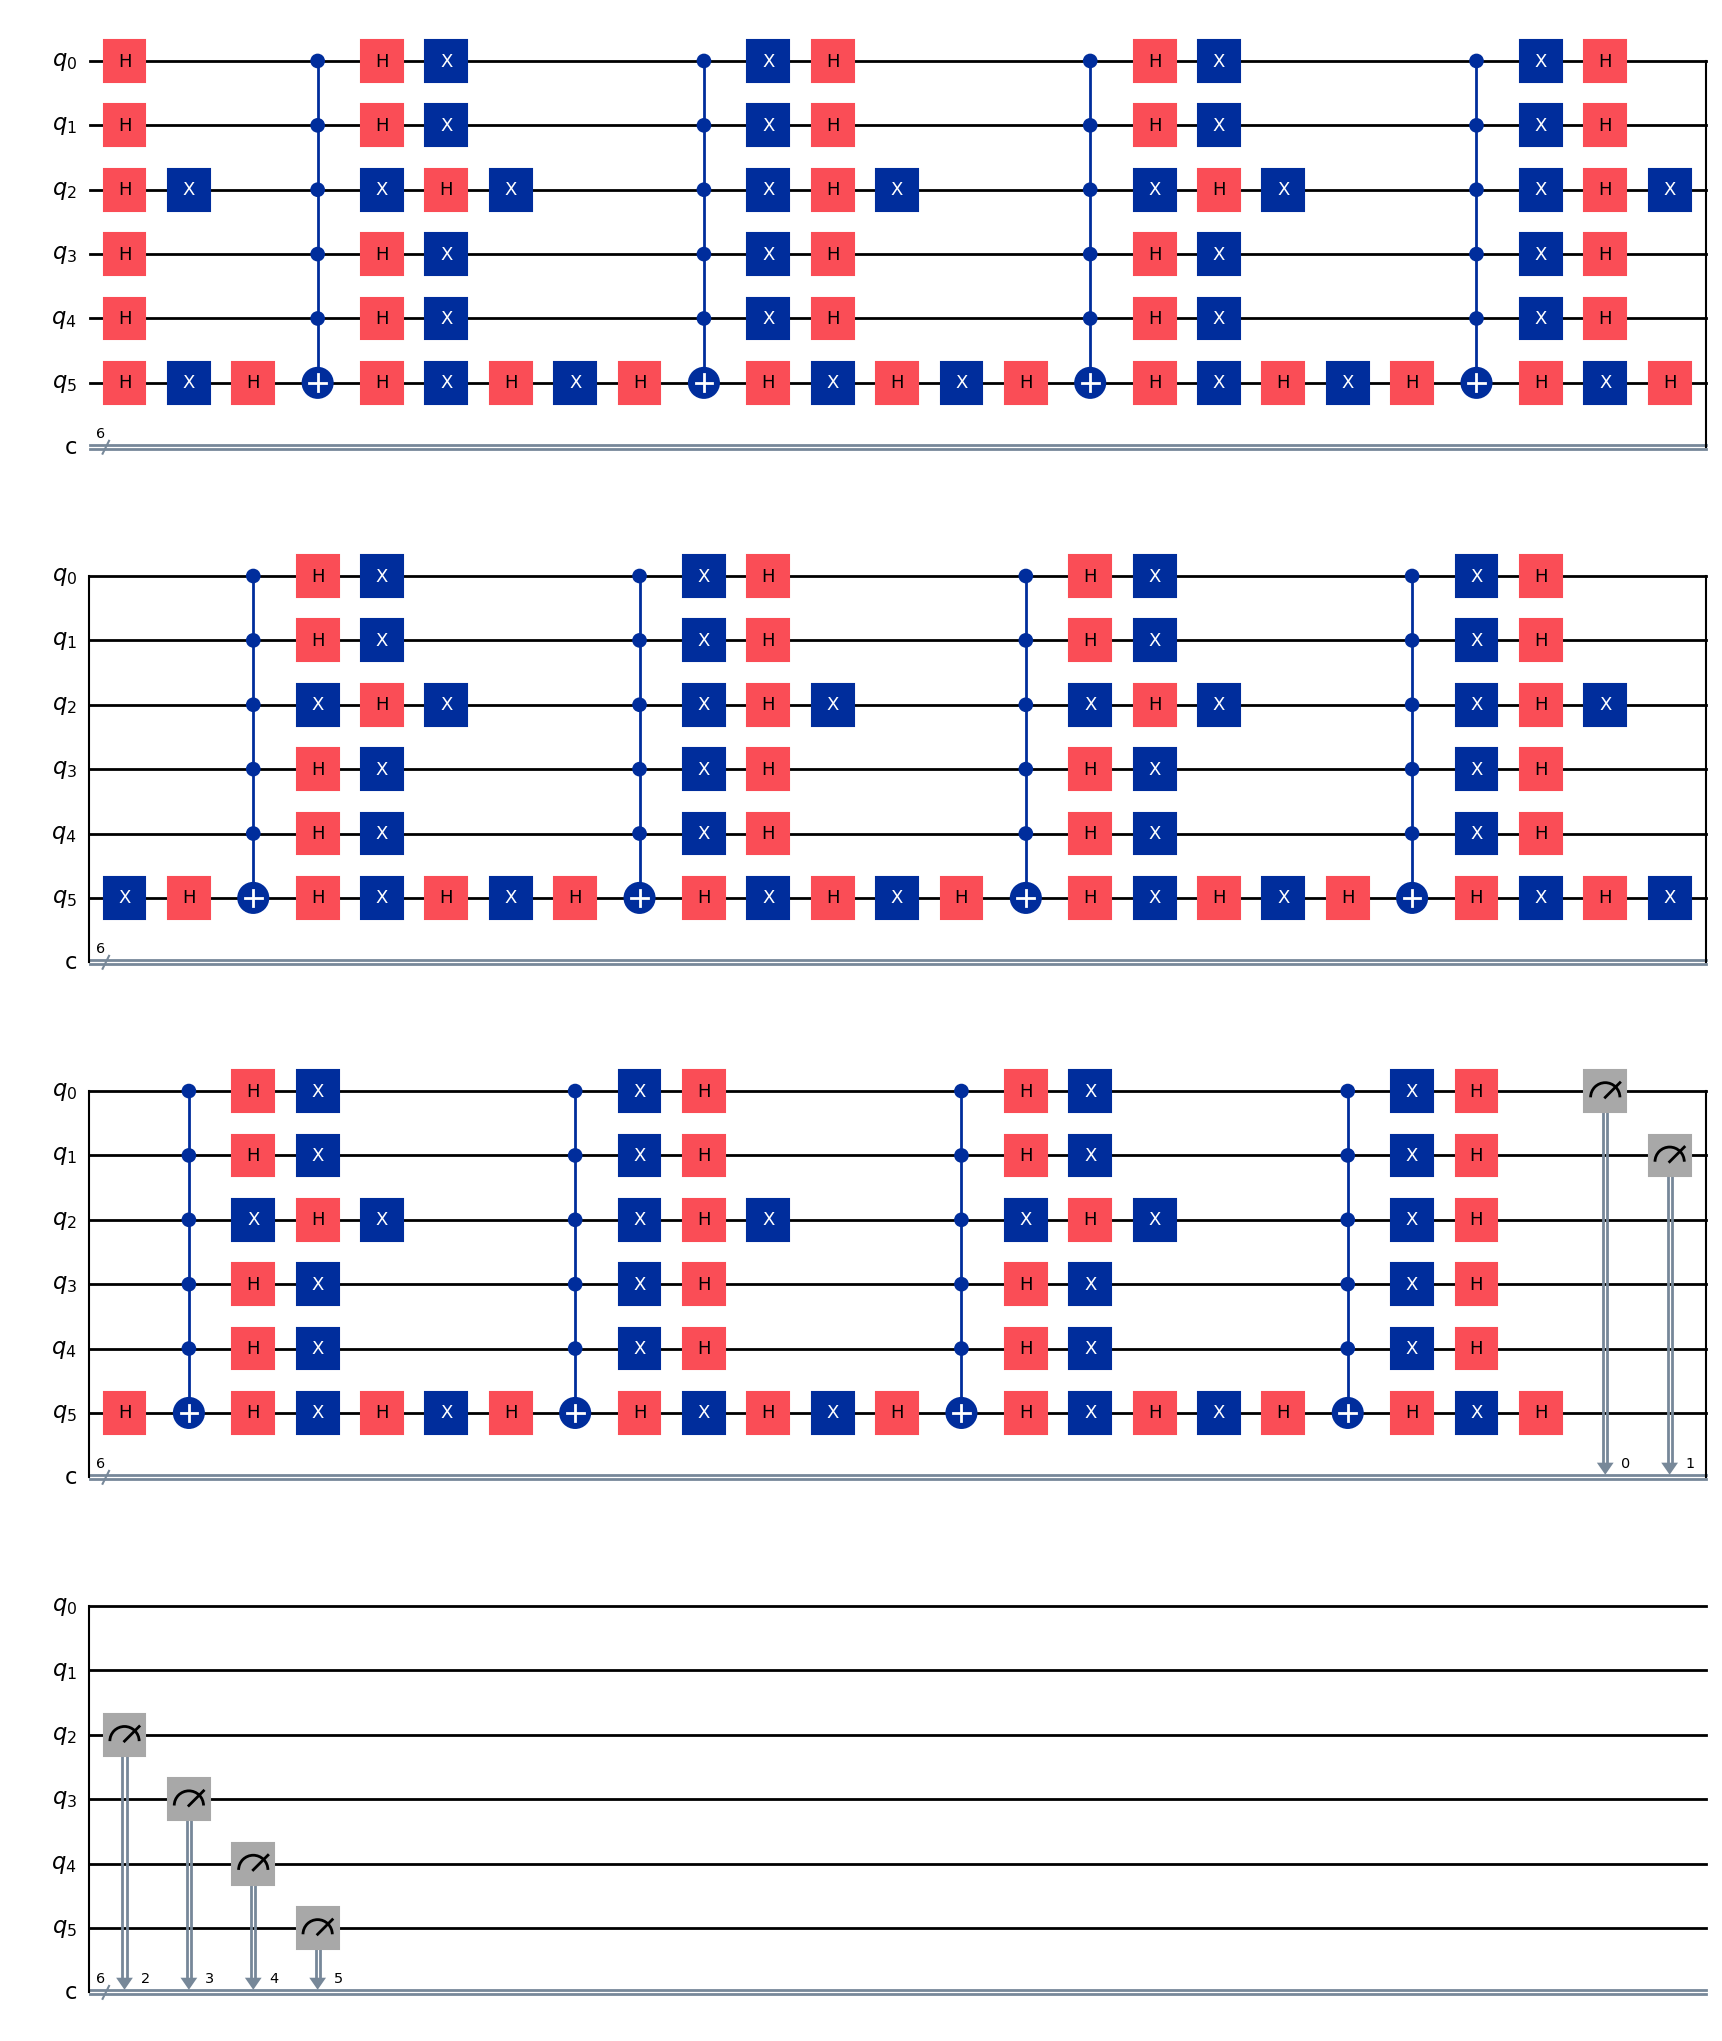

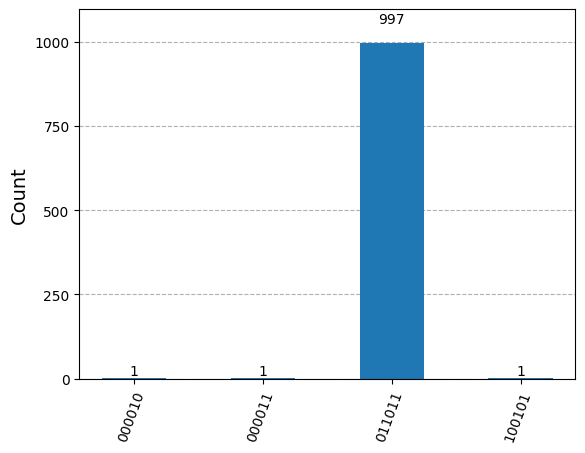

In [6]:
#generalised oracle
from qiskit import QuantumCircuit, transpile
from qiskit_aer import Aer
from qiskit.visualization import plot_histogram
from math import pi,sqrt
import matplotlib.pyplot as plt
%matplotlib inline


def oracle(circuit,target_state):
    for i, bit in enumerate(target_state):
        if bit == '0':
            circuit.x(i)

    circuit.h(len(target_state)-1)
    circuit.mcx(list(range(len(target_state)-1)), len(target_state)-1)
    circuit.h(len(target_state)-1)

    for i, bit in enumerate(target_state):
        if bit == '0':
            circuit.x(i)

def diffusion(circuit, n):
    circuit.h(range(n))
    circuit.x(range(n))
    circuit.h(n-1)
    circuit.mcx(list(range(n-1)),n-1)
    circuit.h(n-1)
    circuit.x(range(n))
    circuit.h(range(n))

def grovers(n,target_state):
    circuit = QuantumCircuit(n,n)
    circuit.h(range(n))
    iterations = int((pi/4)* sqrt(2**n))
    for _ in range(iterations):
        oracle(circuit,target_state)
        diffusion(circuit,n)
    circuit.measure(range(n),range(n))
    return circuit

def simulate(n,target_state):
    circuit = grovers(n,target_state)
    simulator = Aer.get_backend('qasm_simulator')
    t_circuit = transpile(circuit,simulator)
    result = simulator.run(t_circuit,shots=1000).result()
    counts = result.get_counts(circuit)
    print("Measurement results:", counts)
    circuit.draw('mpl')

    plot_histogram(counts)
    plt.show()

if __name__ == "__main__":
    n = int(input("Enter the number of qubits: "))
    target_state = input("Enter the target state(e.g., '1010): ")

    if(len(target_state)!=n or not all(bit in ['0','1'] for bit in target_state)):
        print("Invalid target state! Please enter binary string of length equal to number of qubits.")
    else:
        simulate(n,target_state)